# Multilingual Job Fraud Dataset — Exploratory Data Analysis (EDA)

This notebook explores the **final multilingual job fraud dataset** located at  
`../data/processed/multilingual_job_fraud_data.csv`.

Goals of EDA:
- Dataset shape, schema, and memory usage.
- Target distribution (fraudulent vs. real jobs).
- Language distribution.
- Text length analysis.
- Numeric feature statistics and correlations.
- Missing data overview.
- Potential leakage/quality checks.



## 1. Setup and Imports
We start by importing all the necessary libraries for data manipulation, visualization, and text analysis.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_colwidth", 200)
sns.set_theme(context="notebook")

print("✅ Libraries ready")


✅ Libraries ready


## 2. Load the Dataset
Read the final CSV file that was generated after feature engineering.


In [25]:
DATA_PATH = Path("../data/processed/multilingual_job_fraud_data.csv")

df = pd.read_csv(DATA_PATH, low_memory=False)
print(f"✅ Loaded dataset: {DATA_PATH}")
print(f"Shape: {df.shape}")
df.head()


✅ Loaded dataset: ../data/processed/multilingual_job_fraud_data.csv
Shape: (19903, 32)


,job_title,job_description,requirements,benefits,company_name,company_profile,industry,location,employment_type,experience_level,education_level,salary_info,has_company_logo,has_questions,fraudulent,poster_verified,poster_experience,poster_photo,poster_active,language,experience_level_encoded,education_level_encoded,employment_type_encoded,description_length_score,title_word_count,professional_language_score,urgency_language_score,contact_professionalism_score,verification_score,content_quality_score,legitimacy_score,poster_score
0,مشرف تنظيف وتدبير,الإشراف على أنشطة التدبير في المرافق وتنسيقها وتنفيذها، للحفاظ على المرافق مرتبة ونظيفة.,إدارة الجدول الزمني للخدمات. التخطيط للجداول الزمنية الخاصة بأعمال الموظفين، وتحضيرها. الإشراف على الموظفين أثناء أداء واجباتهم، مثل مسح الأتربة وكنس الأرضيات وتنظيف دورات المياه وتغيير الشرا...,NaN,مجموعةالذيابي للمقاولات,خاص,الانشاءات العامة للمباني غير السكنية (مثل المدارس والمستشفيات والفنادق ....الخ),"الرياض, الرياض",دوام كامل,0,NaN,4000.0,1,1,0,1,1,1,0,1,1,0,5,0.09,3,0.00,1.0,1.0,0.9,0.04,1.0,0.74
1,بناء,المشاركة الفعالة في عمليات البناء وفقا للمخططات والرسومات الفنية الموضوعة.,المشاركة في تحضير الموقع لتشييد المباني، وإزالة العقبات وتسوية الأرض. المساعدة بمهام الحرفيين بما في ذلك رص الطوب وتغطية الأرضية والدهان والبياض. تنفيذ التعليمات المتعلقة بالتشييد والمخططات...,NaN,شركة عبدالله محمد اليوسف للمقاولات,خاص,أنشطة خدمات صيانة المباني,"المنطقة الشرقية, الخبر",دوام كامل,0,NaN,4000.0,1,1,0,1,1,0,1,1,1,0,5,0.07,1,0.05,1.0,1.0,0.8,0.06,1.0,0.68
2,بائع مأكولات ومشروبات,بيع المأكولات و المشروبات للزبائن، وتوفير المعلومات المتعلقة بالمأكولات و المشروبات و أسعارها، وتولي أمور الدفع وتلقي المدفوعات من الزبائن.,بيع المأكولات و المشروبات للزبائن. توفير المعلومات المتعلقة بالمأكولات و المشروبات، والأسعار. مراقبة مستويات المخزون والحفاظ على ترتيب المتجر، وإصدار طلبات لشراء المنتجات، والتعامل مع المنت...,NaN,شركة الفصل الخامس للتجارة,خاص,بيع الأغذية والمشروبات بالتجزئة في الأكشاك والأسواق,"الرياض, الخرج",دوام كامل,0,NaN,4500.0,1,1,0,1,0,0,0,1,1,0,5,0.14,3,0.00,1.0,1.0,0.4,0.07,1.0,0.24
3,مهندس كهربائي,إعداد التصاميم والمخططات الكهربائية لمشاريع وأعمال الهندسة الكهربائية ومتابعة التنفيذ وإعداد مخططات ومواصفات خطوط شبكات النقل والتوزيع الكهربائية وتحديد مساراتها، وإعداد برامج تشغيل المعدات الكهرب...,إعداد التصاميم والمخططات الكهربائية لمشاريع وأعمال الهندسة الكهربائية ومتابعة التنفيذ وإعداد مخططات ومواصفات خطوط شبكات النقل والتوزيع الكهربائية وتحديد مساراتها إعداد برامج تشغيل الأنظمة وال...,NaN,شركة مجموعة الفارس التجارية (شركة شخص واحد),خاص,أنشطة خدمات صيانة المباني,"عسير, ابها",دوام كامل,2,"['Professional certificate \\ License data', 'تصنيف هيئة المهندسين', 'ضروري']",7500.0,1,0,0,1,1,1,0,1,3,0,5,0.39,2,0.00,1.0,1.0,0.9,0.20,1.0,0.74
4,معلم ابتدائي علوم ورياضيات,تخطيط وتحضير الدروس المتعلقة بالعلوم والرياضيات لطلاب المرحلة الابتدائية وتدريسهم وتوجيههم.,تحضير الدروس الخاصة بالعلوم والرياضيات وفقاً للمناهج المعتمدة ووفقاً للرؤية الأكاديمية للمدرسة. تدريس طلاب المرحلة الابتدائية وتيسير المناقشات المختلفة في الصف، وتقديم الواجبات المنزلية وإدارة س...,NaN,شركة مدارس موسوعة العلوم الاهلية,خاص,التعليم المتوسط للطالبات بمنهج وطني,"الرياض, الرياض",دوام كامل,4,"['Skill data', 'استخدام أدوات التكنولوجيا في التعليم ', 'محترف', 'Language data', 'اللغة الإنجليزية ', 'متوسط']",6000.0,0,1,0,1,1,1,1,1,5,0,5,0.09,4,0.00,1.0,1.0,1.0,0.04,1.0,1.00


## 3. Dataset Overview
Check:
- Columns and data types
- Memory usage
- Missing values


In [26]:
def mem_gb(df):
    return df.memory_usage(deep=True).sum() / (1024**3)

print("Columns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)
print(f"\nMemory usage: {mem_gb(df):.3f} GB")
print("\nMissing values per column (top 20):")
df.isna().sum().sort_values(ascending=False).head(20)


Columns: ['job_title', 'job_description', 'requirements', 'benefits', 'company_name', 'company_profile', 'industry', 'location', 'employment_type', 'experience_level', 'education_level', 'salary_info', 'has_company_logo', 'has_questions', 'fraudulent', 'poster_verified', 'poster_experience', 'poster_photo', 'poster_active', 'language', 'experience_level_encoded', 'education_level_encoded', 'employment_type_encoded', 'description_length_score', 'title_word_count', 'professional_language_score', 'urgency_language_score', 'contact_professionalism_score', 'verification_score', 'content_quality_score', 'legitimacy_score', 'poster_score']

Dtypes:
 job_title                         object
job_description                   object
requirements                      object
benefits                          object
company_name                      object
company_profile                   object
industry                          object
location                          object
employment_type      

salary_info                      17882
company_profile                  11547
education_level                   9299
benefits                          9235
experience_level                  7050
industry                          5496
employment_type                   3471
company_name                      3308
requirements                      2696
job_description                      1
urgency_language_score               0
description_length_score             0
title_word_count                     0
professional_language_score          0
job_title                            0
contact_professionalism_score        0
verification_score                   0
content_quality_score                0
education_level_encoded              0
legitimacy_score                     0
dtype: int64

## 4. Data Quality Checks
Detect:
- Duplicate rows
- Constant columns
- Mostly-null columns


In [27]:
dup_count = df.duplicated().sum()
const_cols = [c for c in df.columns if df[c].nunique(dropna=False) <= 1]
mostly_null_cols = [c for c in df.columns if df[c].isna().mean() >= 0.95]

print(f"Duplicate rows: {dup_count}")
print("Constant columns:", const_cols[:20])
print("Mostly-null columns (>=95% null):", mostly_null_cols[:20])


Duplicate rows: 785
Constant columns: []
Mostly-null columns (>=95% null): []


## 5. Target Variable Distribution
Analyze distribution of `fraudulent` column.


fraudulent
0    18484
1     1419
Name: count, dtype: int64

Class balance (%):
fraudulent
0    92.87
1     7.13
Name: proportion, dtype: float64


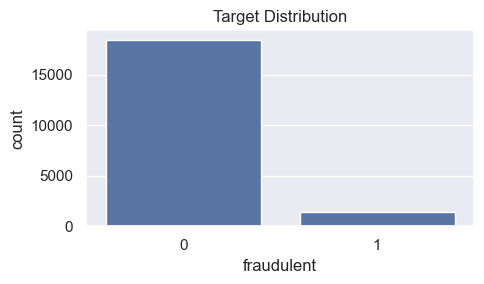

In [28]:
target_col = "fraudulent"
print(df[target_col].value_counts())
print("\nClass balance (%):")
print((df[target_col].value_counts(normalize=True) * 100).round(2))

plt.figure(figsize=(5,3))
sns.countplot(x=df[target_col])
plt.title("Target Distribution")
plt.tight_layout()
plt.show()


## 6. Language Distribution
Analyze dataset split between English (0) and Arabic (1).


language
0    17880
1     2023
Name: count, dtype: int64


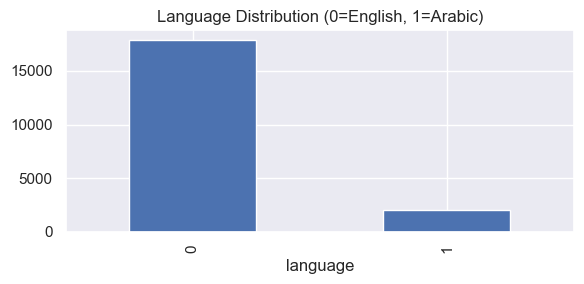

In [29]:
lang_col = "language"
print(df[lang_col].value_counts())

plt.figure(figsize=(6,3))
df[lang_col].value_counts().plot(kind="bar")
plt.title("Language Distribution (0=English, 1=Arabic)")
plt.tight_layout()
plt.show()


## 7c. Overall Text vs Target Analysis (Normalized)
We compare **all text fields combined** (title, description, requirements, benefits) 
between Real vs Fake jobs using **relative frequency** instead of raw counts 
(to correct for dataset imbalance).



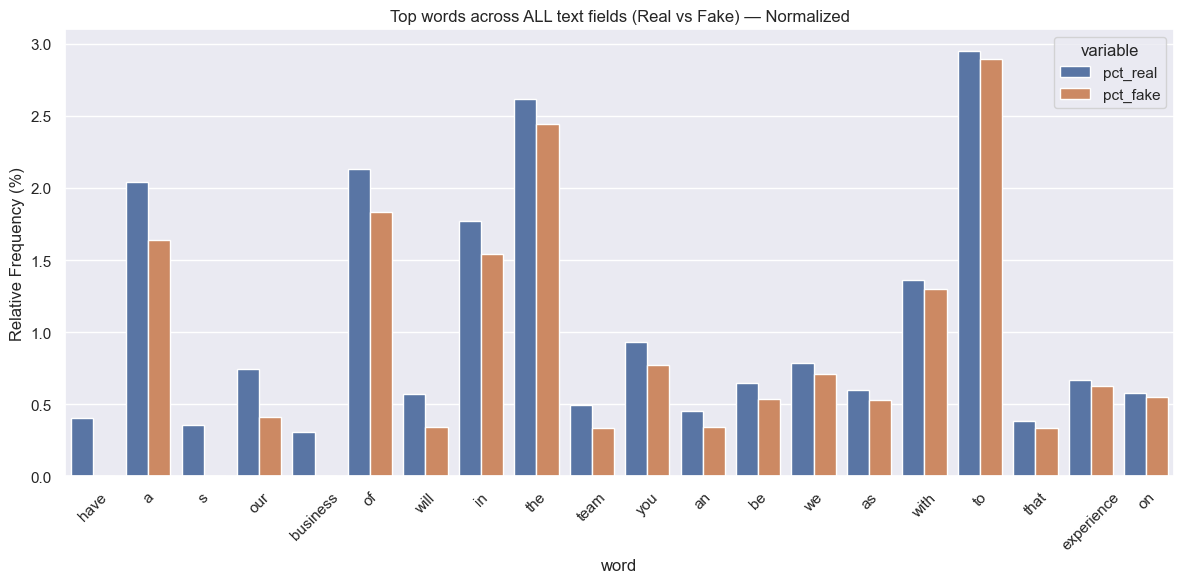

In [35]:
import re
from collections import Counter
import pandas as pd


text_cols = ["job_title", "job_description", "requirements", "benefits"]

def top_words_normalized(df_subset, label, n=20):
    words = []
    for col in text_cols:
        if col in df_subset.columns:
            for text in df_subset[col].dropna().astype(str):
                tokens = re.findall(r"\w+", text.lower())
                words.extend(tokens)
    counts = Counter(words)
    total = sum(counts.values())
    
    freq = {w: (c/total)*100 for w,c in counts.most_common(n)}
    return pd.DataFrame(list(freq.items()), columns=["word", f"pct_{label}"])


real_words = top_words_normalized(df[df["fraudulent"]==0], "real", 30)
fake_words = top_words_normalized(df[df["fraudulent"]==1], "fake", 30)


merged = pd.merge(real_words, fake_words, on="word", how="outer").fillna(0)


merged["diff"] = merged["pct_real"] - merged["pct_fake"]
merged = merged.sort_values("diff", ascending=False).head(20)


plt.figure(figsize=(12,6))
sns.barplot(
    data=merged.melt(id_vars="word", value_vars=["pct_real","pct_fake"]), 
    x="word", y="value", hue="variable"
)
plt.xticks(rotation=45)
plt.ylabel("Relative Frequency (%)")
plt.title("Top words across ALL text fields (Real vs Fake) — Normalized")
plt.tight_layout()
plt.show()


## 8. Numeric Features Analysis
Summarize numeric features and show correlation heatmap.


Numeric columns: ['salary_info', 'has_company_logo', 'has_questions', 'fraudulent', 'poster_verified', 'poster_experience', 'poster_photo', 'poster_active', 'language', 'experience_level_encoded', 'education_level_encoded', 'employment_type_encoded', 'description_length_score', 'title_word_count', 'professional_language_score', 'urgency_language_score', 'contact_professionalism_score', 'verification_score', 'content_quality_score', 'legitimacy_score']


,count,mean,std,min,25%,50%,75%,max
contact_professionalism_score,19903.0,0.998282,0.018459,0.8,1.00,1.00,1.00,1.00
content_quality_score,19903.0,0.413868,0.186434,0.0,0.25,0.50,0.57,0.72
description_length_score,19903.0,0.729652,0.324459,0.0,0.45,0.92,1.00,1.00
education_level_encoded,19903.0,1.446666,1.827298,0.0,0.00,0.00,4.00,6.00
employment_type_encoded,19903.0,3.664171,2.068825,0.0,1.00,5.00,5.00,6.00
experience_level_encoded,19903.0,1.283977,1.384790,0.0,0.00,1.00,3.00,5.00
fraudulent,19903.0,0.071296,0.257325,0.0,0.00,0.00,0.00,1.00
has_company_logo,19903.0,0.786565,0.409743,0.0,1.00,1.00,1.00,1.00
has_questions,19903.0,0.503190,0.500002,0.0,0.00,1.00,1.00,1.00
language,19903.0,0.101643,0.302186,0.0,0.00,0.00,0.00,1.00


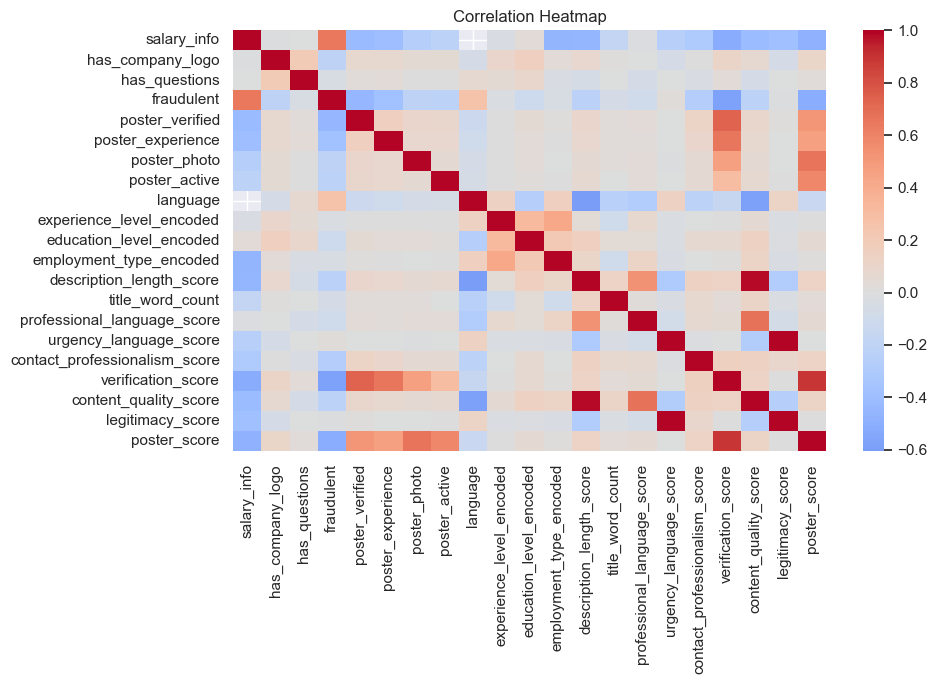

In [21]:
num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
print("Numeric columns:", num_cols[:20])

if num_cols:
    display(df[num_cols].describe().T.sort_index())
    corr = df[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(10,7))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()


## 9. Categorical Features
Summarize unique values and top categories for categorical features.


In [22]:
cat_cols = [c for c in df.columns if df[c].dtype == "object"]
summ = []
for c in cat_cols:
    nunique = df[c].nunique(dropna=True)
    top_vals = df[c].value_counts(dropna=False).head(5).to_dict()
    summ.append((c, nunique, top_vals))
pd.DataFrame(summ, columns=["column", "unique_values", "top_5"]).sort_values("unique_values", ascending=False).head(20)


,column,unique_values,top_5
1,job_description,15283,"{'Play with kids, get paid for it Love travel? Jobs in Asia$1,500+ USD monthly ($200 Cost of living)Housing provided (Private/Furnished)Airfare ReimbursedExcellent for student loans/credit cardsGa..."
2,requirements,12433,"{nan: 2696, 'University degree required. TEFL / TESOL / CELTA or teaching experience preferred but not necessaryCanada/US passport holders only': 410, 'University degree required. TEFL / TESOL / C..."
0,job_title,11580,"{'English Teacher Abroad ': 311, 'Customer Service Associate ': 146, 'Graduates: English Teacher Abroad (Conversational)': 144, 'محاسب': 136, 'بائع': 98}"
3,benefits,6200,"{nan: 9235, 'See job description': 726, 'Career prospects.': 158, 'CSD offers a competitive benefits package for full-time employees. For a full list of benefits and perks, please visit the career..."
4,company_name,2592,"{nan: 3308, 'We help teachers get safe &amp; secure jobs abroad :)': 726, 'We Provide Full Time Permanent Positions for many medium to large US companies': 674, 'Novitex Enterprise Solutions, form..."
5,company_profile,1341,"{nan: 11547, 'خاص': 1649, 'Sales': 551, 'Engineering': 487, 'Marketing': 401}"
10,education_level,635,"{nan: 9299, 'Bachelor's Degree': 5145, 'High School or equivalent': 2080, 'Unspecified': 1397, 'Master's Degree': 416}"
6,industry,495,"{nan: 5496, 'Information Technology and Services': 1734, 'Computer Software': 1376, 'Internet': 1062, 'Marketing and Advertising': 828}"
7,location,146,"{'Remote': 17880, 'الرياض, الرياض': 559, 'مكة المكرمة, جده': 276, 'المنطقة الشرقية, الدمام': 114, 'المدينة المنورة, المدينه': 85}"
9,experience_level,18,"{nan: 7050, 'Mid-Senior level': 3809, 'Entry level': 2697, 'Associate': 2297, 'Not Applicable': 1116}"


## 10. Missing Data Analysis
Visualize top-20 columns with missing values.


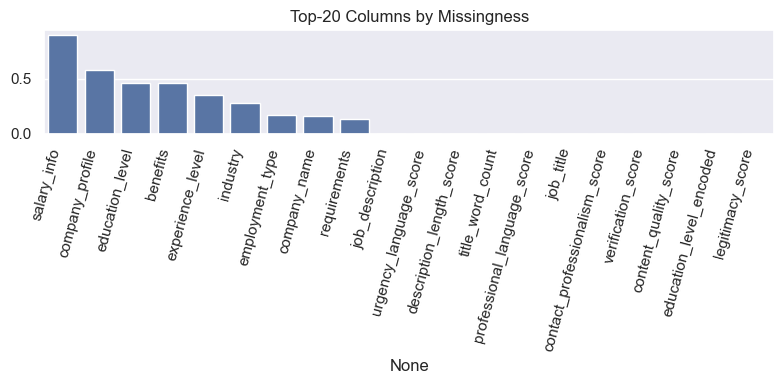

In [23]:
null_pct = df.isna().mean().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=null_pct.head(20).index, y=null_pct.head(20).values)
plt.xticks(rotation=75, ha="right")
plt.title("Top-20 Columns by Missingness")
plt.tight_layout()
plt.show()


## 11. Potential Leakage Checks
Look for columns that may be too correlated with the target.


In [30]:
issues = []
for c in df.columns:
    if c == target_col:
        continue
    try:
        agree = (df[c] == df[target_col]).mean()
        if agree >= 0.98:
            issues.append(f"Column '{c}' matches target {agree:.2%}")
    except Exception:
        pass

print("Potential leakage issues:")
print(issues if issues else "None detected")


Potential leakage issues:
None detected


# 📊 Multilingual Job Fraud Dataset — EDA Summary

## Dataset Statistics
- **Shape:** 19,903 rows × 32 columns  
- **Memory usage:** ~0.07 GB  
- **Duplicate rows:** 785  
- **Constant columns:** None  
- **Mostly-null columns:** None (≥95% null)  

---

## Target Distribution (`fraudulent`)
- 0 (Real jobs): ~92.9%  
- 1 (Fake jobs): ~7.1%  

⚖️ **Highly imbalanced** dataset (few fake jobs).

---

## Language Distribution (`language`)
- 0 = English: **17,880 records (90%)**  
- 1 = Arabic: **2,023 records (10%)**

⚠️ Dataset is dominated by English postings.

---

## Missing Values (Top)
- `salary_info`: 17,882 missing (~90%)  
- `company_profile`: 11,547 missing (~58%)  
- `education_level`: 9,299 missing (~47%)  
- `benefits`: 9,235 missing (~46%)  
- `experience_level`: 7,050 missing (~35%)  
- `industry`: 5,496 missing (~28%)  
- `employment_type`: 3,471 missing (~17%)  
- `company_name`: 3,308 missing (~16%)  
- `requirements`: 2,696 missing (~14%)  
- `job_description`: only 1 missing  

---

## Text Columns
- **Job Title:** avg length ~27 chars (max 142)  
- **Job Description:** avg length ~1,100 chars (max capped at 5000)  
- **Requirements:** avg length ~565 chars (max capped at 3000)  

---

## Numeric Features (Highlights)
- `has_company_logo`: mean **0.79** → most jobs include a logo  
- `has_questions`: mean **0.50** → half of postings have follow-up questions  
- `poster_verified`: mean **0.80** → most posters appear verified  
- `poster_experience`: mean **0.70**  
- `poster_photo`: mean **0.67**  
- `poster_active`: mean **0.57**  

**Engineered scores:**  
- `description_length_score`: avg **0.73**  
- `content_quality_score`: avg **0.41**  
- `legitimacy_score`: avg **0.95**  
- `poster_score`: avg **0.68**  
- `professional_language_score`: very low avg **0.10** (most postings don’t have strong professional keywords)  
- `contact_professionalism_score`: ~1.0 (almost all postings avoid suspicious contact info)  

---

## Categorical Features (Samples)
- **Job Titles:** 11,580 unique (top: *English Teacher Abroad*, *Customer Service Associate*, *محاسب*)  
- **Requirements:** 12,433 unique (many missing; common = “University degree required…”)  
- **Benefits:** 6,200 unique (many missing; common = “See job description”)  
- **Company Names:** 2,592 unique (3,308 missing)  
- **Company Profile (English):** 1,341 unique (top = “Sales”, “Engineering”, “Marketing”)  
- **Education Level:** 635 unique (many missing; common = *Bachelor’s*, *High School*)  
- **Industry:** 495 unique (top = *IT Services*, *Software*, *Internet*)  
- **Location:** 146 unique (dominant = *Remote*, plus Saudi cities like *الرياض*, *جدة*)  
- **Experience Level:** 18 categories (common = *Mid-Senior*, *Entry*, *Associate*)  
- **Employment Type:** 9 categories (mix of *Full-time*, *Part-time*, etc.)  

---

## Potential Leakage Check
- **No columns detected** with near-perfect correlation to `fraudulent`.  
Poster-related features are predictive but **not perfectly aligned** (good for ML).

---

## Key Insights
1. Dataset is **class-imbalanced** (fraudulent jobs ~7%).  
2. **English postings dominate** (90% vs. 10% Arabic).  
3. High missingness in **salary, benefits, education, industry**.  
4. Text fields are **rich and long** → useful for NLP models later.  
5. Engineered features (`poster_verified`, `legitimacy_score`, etc.) provide strong signals without perfect leakage.  
6. Many **unique job titles/requirements** → potential for embeddings or feature hashing.  

---


## 🧹 Data Cleaning & Preprocessing

- **Centralized Processor**: all steps handled in one class `DataProcessor`.  

- **Cleaning**:  
  - Removes HTML/scripts  
  - Normalizes whitespace  
  - Deletes special chars  
  - Fills missing values  
  - Validates column types  

- **Encoding**:  
  - Converts categoricals (`employment_type`, `experience`, `education`, `industry`, `function`) into numeric codes  
  - Unseen values → **-1**  

- **Scaling**:  
  - Numeric features scaled with **StandardScaler**  

- **Balancing**:  
  - **SMOTE** or random oversampling  
  - Applied **only to training data**  

- **Scraped Data Prep**:  
  - Maps raw scraped job postings into structured fields  
  - Extracts poster verification signals (verified, photo, experience, activity)  

👉 **Key idea**: one unified processor ensures training and inference follow the same rules, preventing drift and ensuring reproducibility.
